# Prediction via Random Forest Model

In [8]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%autoreload 2

In [10]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from functions import read_merge_prepare_data, train_test_rolling

## Prepare Data Input

In [19]:
 # Setting display options to show all columns without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [20]:
periods = ['Q1', 'Q2', 'Q3', 'A1', 'A2']

In [21]:
macro_file_path = "data/processed_data/macro_data.csv"
Macro_Data = pd.read_csv(macro_file_path)


In [22]:
# Create an empty dictionary to store DataFrames
forecast_data = {}

# Read CSV files into DataFrames and store them in the dictionary
for forecast in periods:
    forecast_data[forecast] = read_merge_prepare_data(forecast, Macro_Data)

Q1 Missing Values:
price              17
ret                19
capei           41124
be              41124
bm              41124
                ...  
mktcap          41124
ptb             41124
peg_trailing    41124
divyield        41124
ffi49           41124
Length: 72, dtype: int64
Q2 Missing Values:
price              14
ret                15
capei           34783
be              34783
bm              34783
                ...  
mktcap          34783
ptb             34783
peg_trailing    34783
divyield        34783
ffi49           34783
Length: 72, dtype: int64
Q3 Missing Values:
price              14
ret                15
capei           30430
be              30430
bm              30430
                ...  
mktcap          30430
ptb             30430
peg_trailing    30430
divyield        30430
ffi49           30430
Length: 72, dtype: int64
A1 Missing Values:
price              21
ret                23
capei           45441
be              45441
bm              45441
             

# Rolling window Random Forest

In [ ]:
results_rolling = {}

# note: run 18 min for Q1 with 1% sample
for forecast, df in forecast_data.items():
    print(forecast)
    results_rolling[forecast] = train_test_rolling(forecast, df)

## Visualize Results

In [28]:
# reread file saved from previous step
results_rolling = {}
for period in periods:
    results_rolling[period] = pd.read_csv(f"results/{period}_rf.csv")

 bias for Q1  = 0.002838048990489972
 bias for Q2  = 0.004036524876325448
 bias for Q3  = 0.004485181649909325
 bias for A1  = 0.014053786645587972
 bias for A2  = 0.018966017184110052


<Figure size 640x480 with 0 Axes>

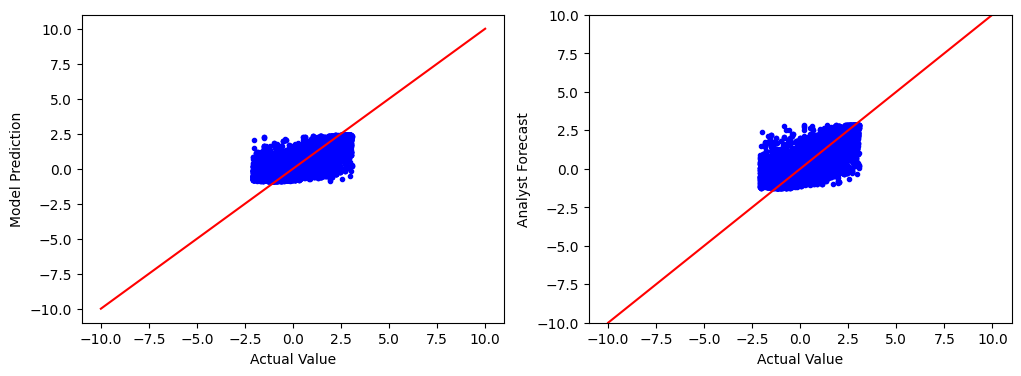

<Figure size 640x480 with 0 Axes>

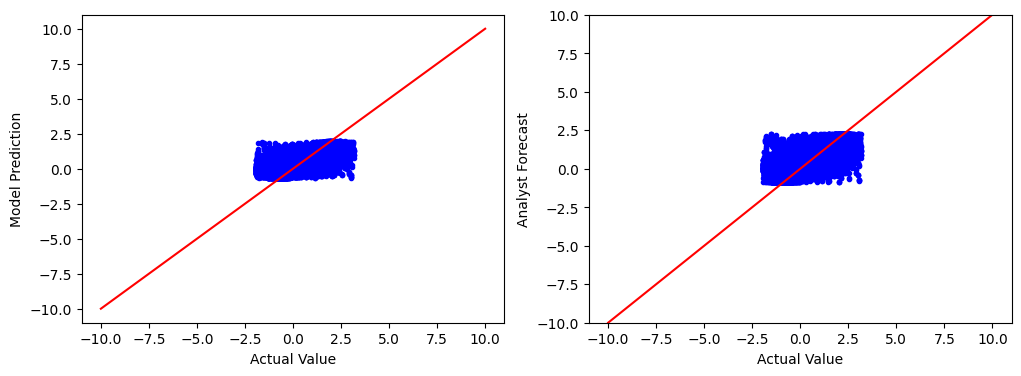

<Figure size 640x480 with 0 Axes>

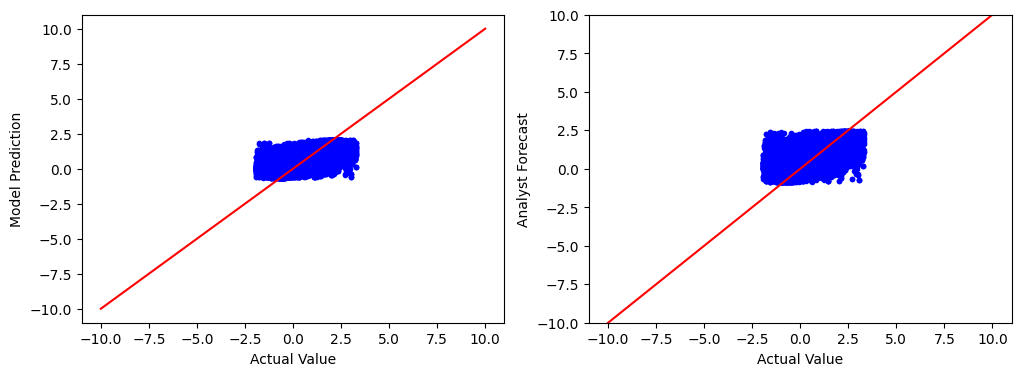

<Figure size 640x480 with 0 Axes>

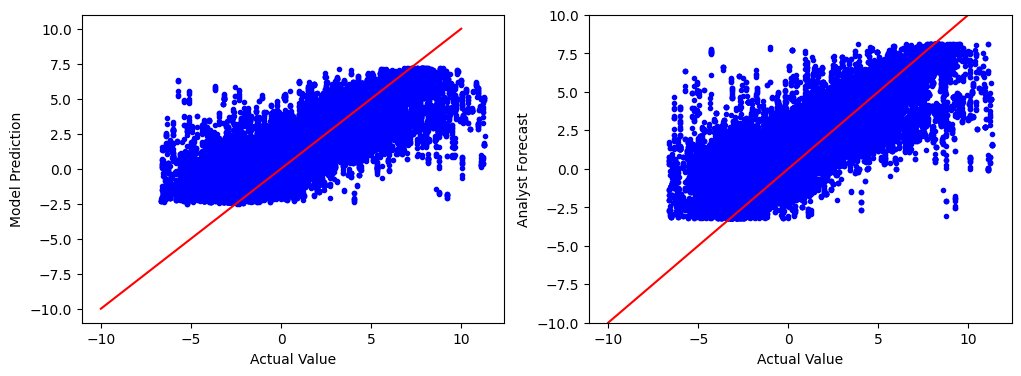

<Figure size 640x480 with 0 Axes>

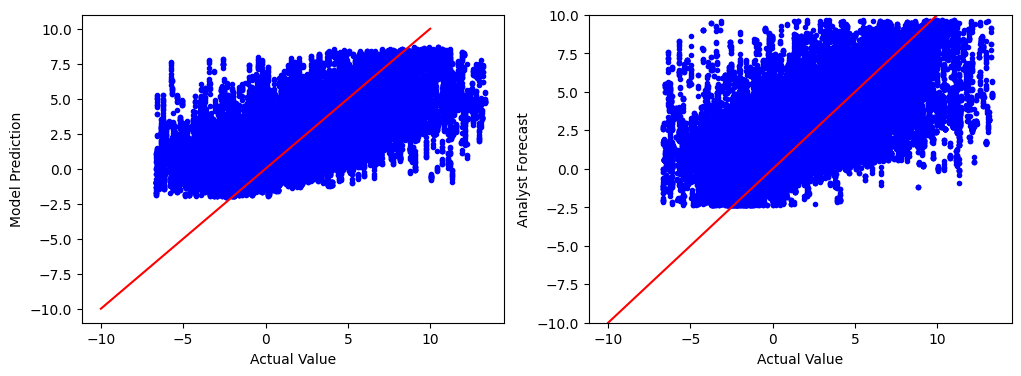

In [29]:
for period in periods:
    f = plt.figure()
    fig, ax = plt.subplots(1,2, figsize=(12, 4))
    ax[0].plot(results_rolling[period].adj_actual, results_rolling[period].predicted_adj_actual, '.', color='blue')
    ax[0].plot([-10, 10], [-10, 10], 'r-')
    ax[0].set_xlabel('Actual Value')
    ax[0].set_ylabel('Model Prediction')
   
    print(f' bias for {period}  = {results_rolling[period].bias_AF_ML.mean()}')

    # plot forecast and exact 
    ax[1].plot(results_rolling[period].adj_actual, results_rolling[period].meanest, '.', color='blue')
    ax[1].plot([-10,10], [-10,10], 'r-')
    ax[1].set_xlabel('Actual Value')
    ax[1].set_ylabel('Analyst Forecast')
    ax[1].set_ylim(-10,10)
    f.savefig(f'images/{period}_RF_forecast_and_analyst_vs_actual.pdf', dpi=100, format='pdf')  
                    
   

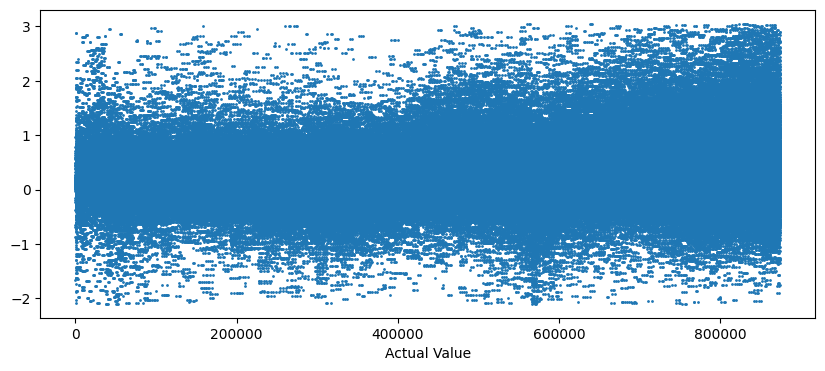

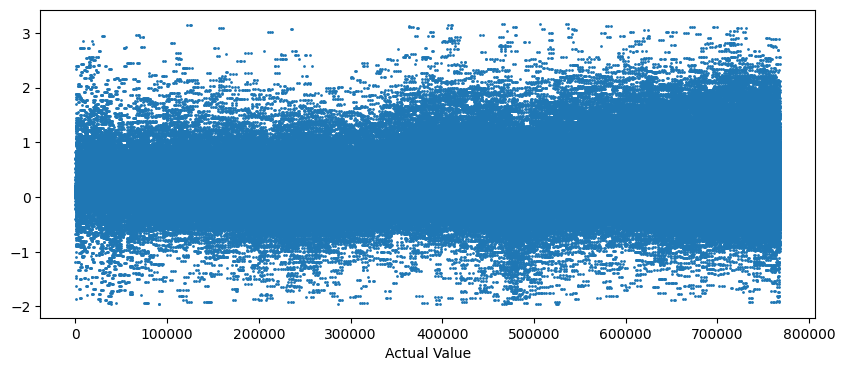

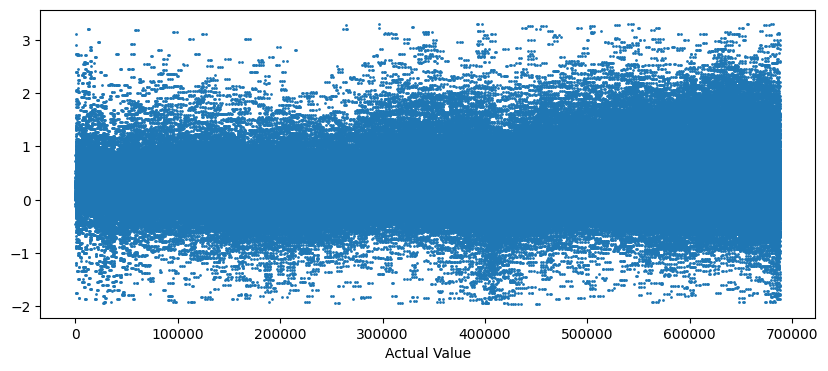

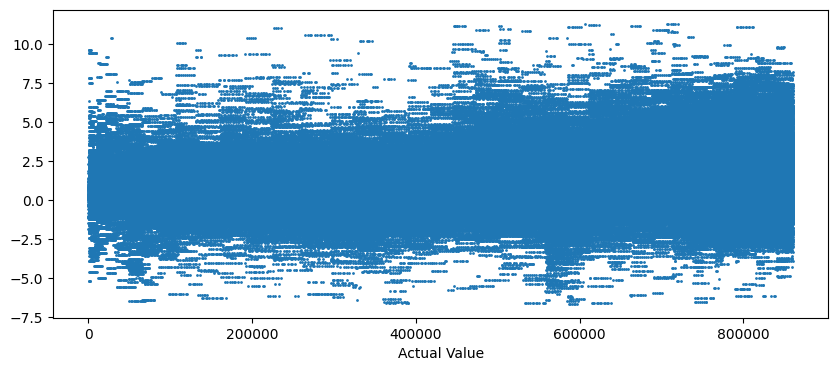

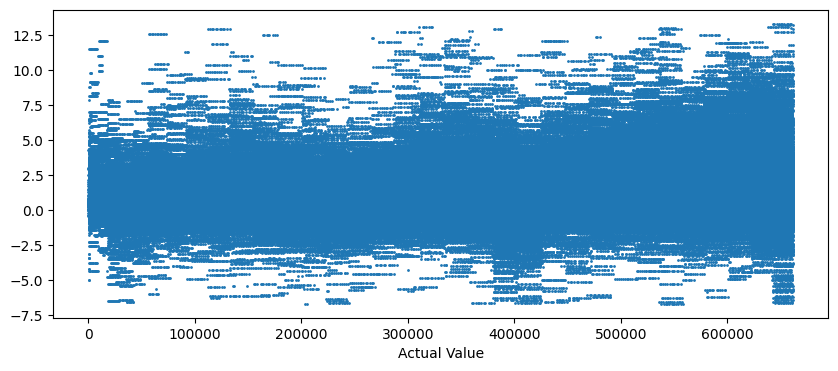

In [30]:
for period, df in results_rolling.items():
    fig, ax = plt.subplots(1,1, figsize=(10, 4))
    plt.scatter(range(len(df)),df.adj_actual, s=1)
    plt.xlabel('Actual Value')
    plt.show()

In [31]:
for period, df in results_rolling.items():
    print(f' {period} r2_score RF is {r2_score(df.adj_actual, df.predicted_adj_actual)}')
    print(f' {period} r2_score LR is {r2_score(df.adj_actual, df.predicted_adj_actual_LR)}')
    print(f' {period} r2_score analyst  is {r2_score(df.adj_actual, df.meanest)}')

 Q1 r2_score RF is 0.8469066421139615
 Q1 r2_score LR is -4.425476649625577e+17
 Q1 r2_score analyst  is 0.8529526226803612
 Q2 r2_score RF is 0.7721522531287828
 Q2 r2_score LR is -2.8145631570140723e+18
 Q2 r2_score analyst  is 0.7622952298174032
 Q3 r2_score RF is 0.7201607123745704
 Q3 r2_score LR is -1.1525017046940261e+18
 Q3 r2_score analyst  is 0.6945498575885144
 A1 r2_score RF is 0.8488549872526301
 A1 r2_score LR is -1.4848594402021972e+18
 A1 r2_score analyst  is 0.8432405869324844
 A2 r2_score RF is 0.6738222895628845
 A2 r2_score LR is -4.4977363789924205e+19
 A2 r2_score analyst  is 0.595329376594012


We see our model has better R squared in all the period dataframe. 


The plot also make us udnerstand why the ml preidctions are bounded: as we train on 1% on the train df evrytime, as we see, the majority of oint on whixh we train will be taken froma  subrnage of the all observation range.